In [25]:
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
from transformers import pipeline,AutoTokenizer
from transformers import pipeline
# generator = pipeline('text-generation', model='openchat/openchat-3.5-0106', max_new_tokens=50)

In [3]:
model_open = "openchat/openchat-3.5-1210"
tokenizer_open = AutoTokenizer.from_pretrained(model_open)
model_open = AutoModelForCausalLM.from_pretrained(model_open, device_map="cuda",load_in_8bit = True)
# model_open.to("cuda")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 3/3 [00:05<00:00,  1.70s/it]
/home/rashed/miniconda3/envs/text_gen/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(


In [39]:
pipe = pipeline("text-generation", model=model_open, tokenizer=tokenizer_open, max_new_tokens=250, pad_token_id=tokenizer_open.eos_token_id)
hf = HuggingFacePipeline(pipeline=pipe, pipeline_kwargs={"temperature": 0})

In [33]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("List of Guest.csv")
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
df.head()

,Name,Gender,Profession,Date Of Birth,District,Thana
0,md. robin,male,business,1985-03-01,dhaka,keraniganj
1,mst. razya begum,female,house wife,1964-02-14,dhaka,keraniganj
2,md. mahfuzul haque,male,business,1968-04-17,dhaka,kalabagan
3,hajera besgum,female,house wife,1985-01-08,dhaka,keraniganj
4,ehsan uddin ahammed,male,business,1963-05-12,dhaka,keraniganj


In [34]:
df.columns = df.columns.str.replace('\s+', '_', regex=True).str.strip().str.lower()

column_names = df.columns.tolist()
column = ', '.join(column_names)
columns_and_types = dict(zip(df.columns, df.dtypes))

# Convert column names and data types to a string
column = ', '.join([f"{key}: {value}" for key, value in columns_and_types.items()])
column

'name: object, gender: object, profession: object, date_of_birth: object, district: object, thana: object'

In [35]:
df.head()

,name,gender,profession,date_of_birth,district,thana
0,md. robin,male,business,1985-03-01,dhaka,keraniganj
1,mst. razya begum,female,house wife,1964-02-14,dhaka,keraniganj
2,md. mahfuzul haque,male,business,1968-04-17,dhaka,kalabagan
3,hajera besgum,female,house wife,1985-01-08,dhaka,keraniganj
4,ehsan uddin ahammed,male,business,1963-05-12,dhaka,keraniganj


In [36]:
# Based on the above question write a pandas code where the pandas DataFrame name is df and the columns name are {column}.
# your task is generating python code without any description of code.
# also the python code should not have ``` in beginning or end.
# return only pandas code without any prefix such as Answer
# return without assingment variable:

/home/rashed/miniconda3/envs/text_gen/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(



plt.figure(figsize=(12, 16))
df['gender'].value_counts().plot(kind='bar')
plt.title('gender distribution')
plt.xticks(rotation='vertical')
plt.savefig('img/output.png')
....................................................................................................


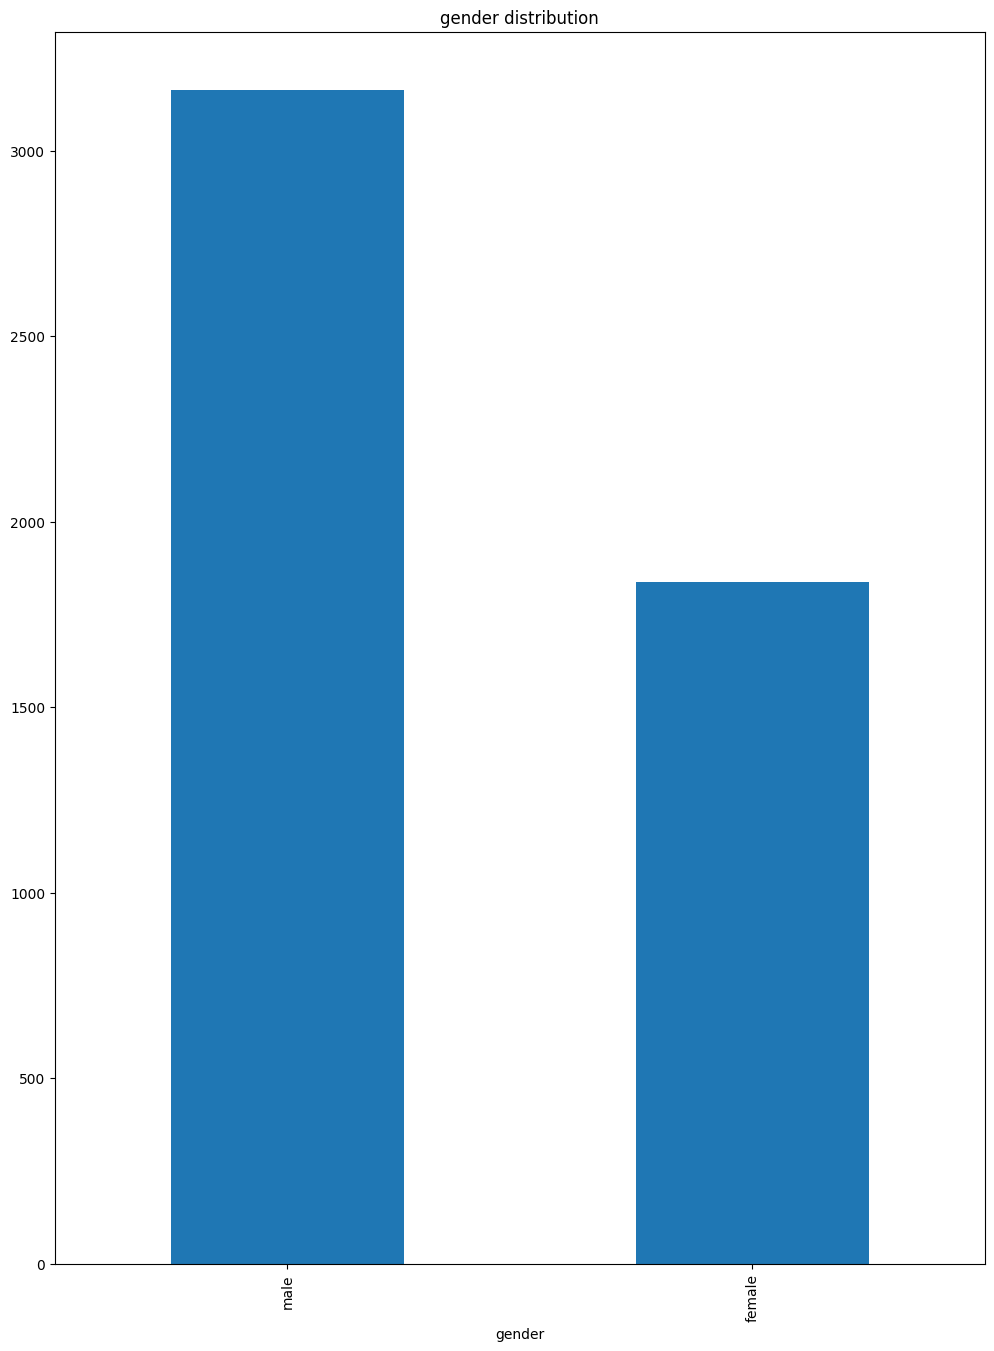

In [44]:
from langchain.prompts import PromptTemplate

template = """
You are an expert in generating python code for data analysis from a Pandas dataframe.
Now your task is to generate Python code from the pandas dataframe based on user questions.
The name of the DataFrame is 'df' and the dataframe columns are: {column}.
If you generate any code for a chart , you save this chart image to the 'img' folder with the name 'output'.
Also, the Python code should not have the line: "df = pd.read_csv('data.csv')" or "plt.show()." and always 'xticks' rotation will be vertical.
you return only answer of the given question, don't return suggestion

Question: generate code for pie chart of gender distribution
Python Code:
gender_counts = df['gender'].value_counts()
# Plotting a Pie Chart
plt.figure(figsize=(12, 16))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender Among Students')
plt.xticks(rotation='vertical')
plt.savefig('img/output.png')

Question: generate Python code for a bar chart showing the count of students in each grade
Python Code:
grade_counts = df['grade'].value_counts()
# Plotting a Bar Chart
plt.figure(figsize=(12, 16))
grade_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation='vertical')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Number of Students in Each Grade')
plt.savefig('img/output.png')

Question: generate Python code for a box plot of the distribution of ages
Python Code:
plt.figure(figsize=(12, 8))
plt.boxplot(df['Age'], vert=False)
plt.xlabel('Age')
plt.title('Box Plot of Age Distribution')
plt.savefig('img/output.png')

Question = please calculate the age based on date of birth  and  find out moast aged person and print name and age?
Python Code:
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Calculate age
df['Date_Of_Birth'] = pd.to_datetime(df['date_of_birth'])
df['age'] = (datetime.now() - df['Date_Of_Birth']).apply(lambda x: x.days // 365)

# Find most aged person
most_aged_person = df.loc[df['age'].idxmax()]

# Print name and age of most aged person
print("The most aged person is: ", most_aged_person['name'], " with age: ", most_aged_person['age'])

Question: how many rows ?
Python Code:
import pandas as pd
print(len(df.index))

<|end_of_turn|>

Question:
{question}

"""
prompt = PromptTemplate.from_template(template)

chain = prompt | hf

question = "draw a bar chat of gender "

response = chain.invoke({"column":column ,"question": question})
response = response.replace('Python Code:','')
# cleaned_code = re.sub(r'\n\s+', '\n', response)
# cleaned_code = response.replace('python code :', '').strip()

# print(" ......................................................................................................")

if "Question:" in response:
    index_of_user_quary = response.find("Question:")
    cleaned = response[:index_of_user_quary]
else:
    cleaned = response

# Print the cleaned code
cleaned = cleaned.lower()
print(cleaned)
print("....................................................................................................")
exec(cleaned)
# print(response)


In [ ]:
# please calculate the average age based on date of birth 
# please calculate the age of Md. Robin based on date of birth 
# draw a pie chart of age based on date of birth  
# draw a bar chat of gender 

In [ ]:
response_index = response.find("Question:")
if response_index == -1:
    print(response)
    exec(response)
else:
    response = response[:response_index]
    print(response[:response_index])
    exec(response)


In [ ]:
len(df)

10

In [ ]:
from llama_cpp import Llama

# # Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
# llm = Llama(
#   model_path="./openchat-3.5-0106.Q4_K_M.gguf",  # Download the model file first
#   n_ctx=8192,  # The max sequence length to use - note that longer sequence lengths require much more resources
#   n_threads=8,            # The number of CPU threads to use, tailor to your system and the resulting performance
#   n_gpu_layers=35         # The number of layers to offload to GPU, if you have GPU acceleration available
# )

# # Simple inference example
# output = llm(
#   "GPT4 Correct User: {prompt}<|end_of_turn|>GPT4 Correct Assistant:", # Prompt
#   max_tokens=512,  # Generate up to 512 tokens
#   stop=["</s>"],   # Example stop token - not necessarily correct for this specific model! Please check before using.
#   echo=True        # Whether to echo the prompt
# )

# Chat Completion API

llm = Llama(model_path="./openchat-3.5-0106.Q4_K_M.gguf", chat_format="llama-2")  # Set chat_format according to the model you are using



In [ ]:
from llama_cpp import Llama
llm = Llama(model_path="TheBloke/openchat-3.5-0106-GGUF", chat_format="llama-2") 

ValueError: Model path does not exist: TheBloke/openchat-3.5-0106-GGUF

In [ ]:
llm.create_chat_completion(
    messages = [
        {"role": "system", "content": "You are a story writing assistant."},
        {
            "role": "user",
            "content": "Write a story about llamas."
        }
    ]
)

In [ ]:
import torch

In [ ]:
# tokenizer_bigcode = AutoTokenizer.from_pretrained("bigcode/gpt_bigcode-santacoder")
# model_bigcode = AutoModelForCausalLM.from_pretrained("bigcode/gpt_bigcode-santacoder", device_map='cuda',load_in_8bit = True, torch_dtype=torch.float16)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# import torch
# from transformers import AutoTokenizer, GPTBigCodeForCausalLM

# tokenizer = AutoTokenizer.from_pretrained("bigcode/gpt_bigcode-santacoder")
# model = GPTBigCodeForCausalLM.from_pretrained("bigcode/gpt_bigcode-santacoder")

# inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
# outputs = model(**inputs, labels=inputs["input_ids"])
# loss = outputs.loss
# logits = outputs.logits

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=100)
# hf = HuggingFacePipeline(pipeline=pipe, pipeline_kwargs={"temperature": 0})

In [ ]:
pipe = pipeline("text2text-generation", model=model, tokenizer=tokenizer, max_new_tokens=100)
hf = HuggingFacePipeline(pipeline=pipe, pipeline_kwargs={"temperature": 0})

In [ ]:
from langchain.prompts import PromptTemplate

template = """
Question: {question}
Based on the above question write a pandas code where the pandas DataFrame name is df and the columns name are {column}.
your task is generating python code without any description of code.
also the python code should not have ``` in beginning or end.
return only pandas code without any prefix such as Answer
return without assingment variable:
"""
prompt = PromptTemplate.from_template(template)

chain = prompt | hf

question = "what is the Total innings?"

print(chain.invoke({"question": question,"column":column}))

df = [] for i in range(5): df.append([i for i in range(10)]) for i in range(10): for j in range(10): if i == j: df.append(i) for i in range(10): for j in range(10): if i == j: df.append(i) for


In [ ]:
df 

,Pos,Player,Team,Span,Innings,Runs,Highest_Score,Average,Strike_Rate
0,1,Sachin Tendulkar,India,1989-2012,452,18426,200,44.83,86.23
1,2,Kumar Sangakkara,Sri Lanka,2000-2015,380,14234,169,41.98,78.86
2,3,Ricky Ponting,Australia,1995-2012,365,13704,164,42.03,80.39
3,4,Sanath Jayasuriya,Sri Lanka,1989-2011,433,13430,189,32.36,91.20
4,5,Mahela Jayawardene,Sri Lanka,1998-2015,418,12650,144,33.37,78.96
5,6,Virat Kohli,India,2008-2020,236,11867,183,59.85,93.39
6,7,Inzamam-ul-Haq,Pakistan,1991-2007,350,11739,137,39.52,74.24
7,8,Jacques Kallis,South Africa,1996-2014,314,11579,139,44.36,72.89
8,9,Saurav Ganguly,India,1992-2007,300,11363,183,41.02,73.70
9,10,Rahul Dravid,India,1996-2011,318,10889,153,39.16,71.24
